In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

### Task1: HaarWaveletTransform

1. Write a function haar(x) which takes a signal x, given as a sequence of floating-point numbers, and returns the Haar transformed signal. Recall that the Haar transform only works on a signal which has a length of 2^n. For this part of the assignment, you can assume that x has a length which is a power of 2. The transformed result X should have the same length as x.

In [4]:
def I(x):
    temp = []
    for i in xrange(1, len(x), 2):
        temp.append((x[i] + x[i-1])/float(2))
    return temp

def haar(x):
    transformed = []
    for i in xrange(0, len(x)-2, 2):
        I_temp = I(x)
        temp = []
        for j in xrange(0, len(I_temp),1):
            temp.extend([x[j*2] - I_temp[j]])
        x = I_temp
        transformed = temp + transformed
        if len(x) == 1:
            transformed = x + transformed    
    return transformed 

In [3]:
a = [9, 7, 3, 5, 6, 10, 2, 6]
type(a)

list

In [4]:
haar(a)

[6.0, 0.0, 2.0, 2.0, 1.0, -1.0, -2.0, -2.0]

2. Write a function inverse_haar(X) which reverses the Haar transformation. You can also assume that X has a length which is a power of 2.

In [5]:
def inverse_haar(X):
    N = 1
    x = [X[0]] 
    while True:
        N*=2
        y = [0] * N
        for i in xrange(len(x)):
            y[2 * i] = x[i] + X[i + N/2]
            y[2 * i + 1] = x[i] - X[i + N/2]
        if (len(y) == len(X)):
            return y
        x = y
        

In [71]:
haar_ex = [6,0, 2, 2, 1, -1, -2, -2]

In [72]:
a = [9, 7, 3, 5]
b = haar(a)

In [73]:
inverse_haar(b)

[0, 0]


[0.0, 2.0]

In [55]:
inverse_haar(haar_ex)

[9, 7, 3, 5, 6, 10, 2, 6]

### Task 2: Smoothing accelerometer data
We are going to use the Haar transform to analyze the signal from a smartphone accelerometer as the user performs various actions. 

Press [Enter] to finish


SyntaxError: unexpected EOF while parsing (<string>, line 0)

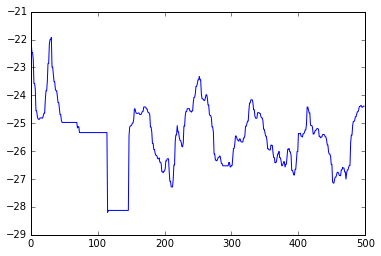

In [7]:
#example code from "accel_example.py"
# loads an accelerometer reading from a file, and graphs the signal from one direction of motion. 
import pylab

def graph_accel(signal):
	pylab.ion()
	pylab.figure()
	pylab.plot(signal)
	pylab.ioff()

if __name__ == '__main__':
	f = open('./Data/accel.csv', 'r')

# Get just the displacement in the x coordinate
	x = [float(line.split(',')[6]) for line in f]

# Graph it, and save figure as a .png
	graph_accel(x)
	pylab.savefig('accel.png')

# Wait for the user to continue (exiting the script closes all figures)
	input('Press [Enter] to finish')

### A. Haartransformeddata
1. Use the function you wrote in Task 1 to transform the data. Recall that Haar requires input
which has a length of 2^n, so you should first trim the input to the largest 2^n-sized
subsequence.

In [53]:
accel_data = np.loadtxt("./Data/accel.csv", delimiter = ",")

In [54]:
#there are 9 wavelets, each of length 499
#trim to 2^8
import math
print accel_data.shape
print math.log(499, 2)
print pow(2,8)


(499, 9)
8.96289600534
256


In [55]:
len(accel_data[:256])

256

In [56]:
# trim accel_data to 2^8
accel_trimmed = accel_data[:256]

In [57]:
accel_trimmed.shape

(256, 9)

In [58]:
for i in accel_trimmed.T:
    print len(i)

256
256
256
256
256
256
256
256
256


In [59]:
#function to calculate haar transform for matrix
def find_transform(x):
    X = []
    for col in x.T:
        X.append(haar(col))
    X = np.asarray(X)
    return X.T

def find_inverse(X):
    x = []
    for col in X.T:
        x.append(inverse_haar(col))
    x = np.asarray(x)
    return x.T

In [60]:
accel_X = find_transform(accel_trimmed)

In [61]:
np.unique(accel_X[:,0] ==haar(accel_trimmed[:,0]))

array([ True], dtype=bool)

2. Graph the result using graph_accel()

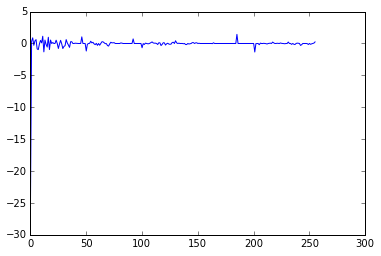

In [62]:
signal = accel_X[:,6]
graph_accel(signal)
pylab.savefig('accel_haar.png')

### B. Haar transforms and “edges”
we can use the Haar transform to find rapid changes in the signal, or “steps”.
First, look at just the second half (i.e., the last 2n-1 entries) of the Haar-transformed signal. These correspond to pairwise differences of individual entries of the original signal. These are typically referred to as the first-order differences, so we'll denote this by X1.

Write a function to find the 5 biggest positive entries of the pairwise differences X1, and the 5 most negative entries. Briefly (one or two sentences) describe what is happening to the original signal at the locations corresponding to these points.

if we find the biggest positive differences of X1, the original signal has more variability at the locations corresponding to these points. (e.g. could have a sudden high peak, or sudden low peak)
if we find the smallest differences, the original signal has less variability at the locations corresponding to these points and will look more flat.

In [153]:
a = accel_X.T[0]
sor = a[128:][a[128:].argsort()]
sor[128-5:128]

array([ 0.034155 ,  0.045855 ,  0.0467825,  0.0598505,  0.070564 ])

In [9]:
def five_Biggest(X):
    half = X.shape[0]/2
    biggest = []
    for col in X.T:
        sorted_X = col[half:][col[half:].argsort()]
        biggest.append(sorted_X[half-5:half])
    return biggest

def five_Smallest(X):
    half = X.shape[0]/2
    smallest = []
    for col in X.T:
        sorted_X = col[half:][col[half:].argsort()]
        smallest.append(sorted_X[0:5])
    return smallest
        
        

In [154]:
X_biggest = five_Biggest(accel_X)
print X_biggest[0]

[ 0.034155   0.045855   0.0467825  0.0598505  0.070564 ]


In [155]:
X_smallest = five_Smallest(accel_X)
print X_smallest[0]

[-0.053964  -0.052482  -0.0465085 -0.03912   -0.0375595]


### C. Smoothing
Loosely speaking, the second half of the Haar transformed signal captures rapid changes in the original signal, while the earlier entries capture more slowly varying changes. This suggests that we can get a smoothed version of the input by ignoring the information in the second half of the Haar-transformed signal.
In particular, we already have a way of inverting the Haar-transform, the function inverse_haar(X) that you wrote earlier. So, we can just throw away the information corresponding to rapid changes, and take the inverse transform of the result. Let's see what happens when we do this.

1. First, take the original signal x and compute its Haar-transform X. Call inverse_haar(X) and graph the result. Compare the result to the original signal (hint: they should be identical).

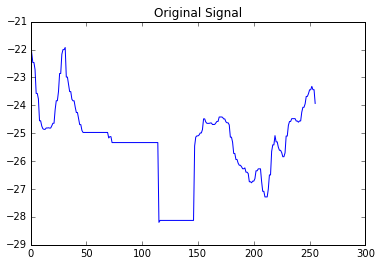

In [76]:
#original signal
graph_accel(accel_trimmed[:,6])
plt.title('Original Signal')
pylab.savefig('accel.png')

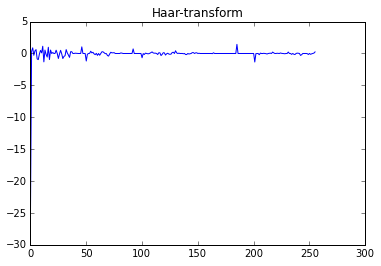

In [74]:
#haar transform
graph_accel(accel_X[:,6])
plt.title('Haar-transform')
pylab.savefig('accel_haar.png')

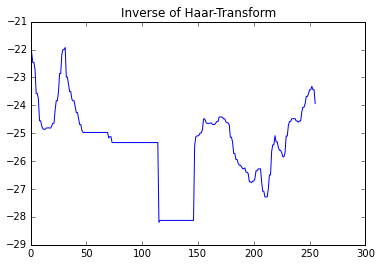

In [75]:
inverse_X = find_inverse(accel_X)
graph_accel(inverse_X[:,6])
plt.title('Inverse of Haar-Transform')
pylab.savefig('accel_haar_inverse.png')

2) Start with the Haar-transformed signal X, and truncate X to the first 2^(n-1) entries. Take the inverse Haar-transform of this truncated X, and graph the result.

In [64]:
len(accel_X)
math.log(len(accel_X), 2)
pow(2,7)

128

In [65]:
#function that truncates X to the first 2^(n-k)
def truncate(X, k):
    N = math.log(len(X),2)
    new_len = pow(2, (N-k))
    return X[:new_len]
    

In [66]:
#truncate X with k = 1
truncate_1 = truncate(accel_X, 1)
print truncate_1[0]

[  2.95644336e-02  -9.96266367e-01  -8.37162891e-03   1.49650391e+00
   9.41646449e-01  -7.58719492e-01  -2.53242656e+01  -4.23626406e+01
   4.00718644e+00]


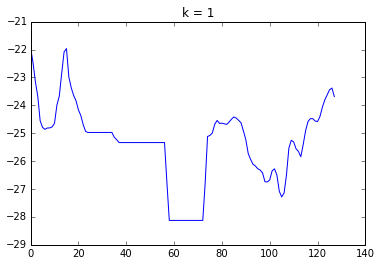

In [78]:
#graph
inv_trunc1 = find_inverse(truncate_1)
graph_accel(inv_trunc1[:,6])
plt.title('k = 1')
pylab.savefig('accel_haar_inverse_trunc1.png')

3) Do the same thing with the first 2^(n-k) entries, for k = 2, 3 and 4, graphing each result. Briefly describe (1 to 2 sentences) what happens as k increases.

as k increases, we lose more and more information about the differences between the points of the signal,thus the graph smooths more and more. We lose a lot of small peaks.

In [68]:
#k = 2
truncate_2 = truncate(accel_X, 2)
#find inverse
inv_trunc2 = find_inverse(truncate_2)

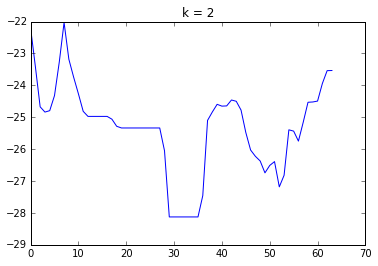

In [77]:
#graph
graph_accel(inv_trunc2[:,6])
plt.title('k = 2')
pylab.savefig('accel_haar_inverse_trunc2.png')

In [70]:
#k=3
truncate_3 = truncate(accel_X, 3)
inv_trunc3 = find_inverse(truncate_3)


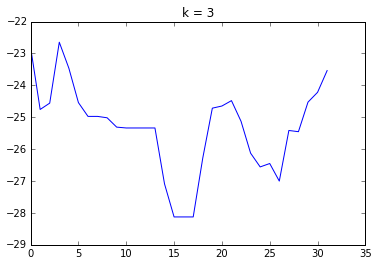

In [79]:
#graph
graph_accel(inv_trunc3[:,6])
plt.title('k = 3')
pylab.savefig('accel_haar_inverse_trunc3.png')

In [72]:
#k=4
truncate_4 = truncate(accel_X, 4)
inv_trunc4 = find_inverse(truncate_4)

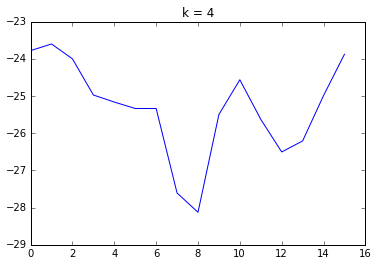

In [80]:
#graph
graph_accel(inv_trunc4[:,6])
plt.title('k = 4')
pylab.savefig('accel_haar_inverse_trunc4.png')

### Task 3: Aligning Audio Signals
A. Using STFT

1. Choose 4 tracks out of the provided 8, and set one of them as your reference track. You can choose yourself which tracks you use, but write their names next to the plots.
1.wav 2.wav 3.wav 4.wav

In [26]:
import scipy.io.wavfile
def question1(path, title, savepath):
	rate, data = scipy.io.wavfile.read(path)
	if len(data.shape) > 1:
		data = data[:,0]
	y = data
	x = range(0,len(data))
	pylab.plot(x, y)
	pylab.title(title)
	pylab.savefig(savepath)
	pylab.close()
	return rate,y	

In [27]:
question1('./Data/tracks/1.wav', '1.wav', '1wav.png')
question1('./Data/tracks/2.wav', '2.wav', '2wav.png')
question1('./Data/tracks/3.wav', '3.wav', '3wav.png')
question1('./Data/tracks/4.wav', '4.wav', '4wav.png')

(44100, array([-20, -18, -15, ...,   1,   1,   1], dtype=int16))

2. Write a function which computes all the peaks of a transformed signal X which are the biggest values in a 20 x 20 surrounding grid (K=20).

In [42]:
def compute(data, K):
	ans = []
	yt = [0]*len(data)
	for i in range(0, len(data) - K + 1):
		for j in range(0, len(data[0]) - K + 1):
			X = data[i:i+K,j:j+K]
			index = np.argmax(X) 
			max_ = np.max(X)
			f = index%20
			s = (index - index%20)/20
			if (f == K/2) & (s == K/2):
				tuple_s = (s+i,f+j)
				ans.append(tuple_s)
				yt[s+i] = max_
	return ans, yt

In [81]:
import Python.audio_example

#provided start and end points
start = [3.07, 0, 0.92, 4.21, 3.57]
end = [4.11, 1.24, 1.97, 5.32, 4.61]
yt_ = []
for i in range(0,5):
    name = str(i+1)
    if i == 4:
        name = 'Rerecord'
    [rate, data] = question1('./Data/tracks/' + name + '.wav', name + '.wav', name + 'wav.png')
    X = Python.audio_example.stft(data[0:10*rate]) 
    Python.audio_example.plot_transform(X)
    plt.title('spectogram_' + name)
    pylab.savefig('spectogram' + name + '.png')
    pylab.close()
    [peaks, yt] = compute(X, 20)
    Python.audio_example.plot_peaks(peaks, start[i]*rate/2048, end[i]*rate/2048)
    pylab.xlim([0,207])
    plt.title('peaks_' + name)
    pylab.savefig('peaks_' + name + '.png')
    pylab.close()
    pylab.xlim([0,207])
    yt_.append(yt)
#     pylab.plot(yt)
#     plt.title('yt_array_' + name)
#     pylab.savefig('yt_array' + name + '.png')
    pylab.close()

    if i != 0:
        cross_correlation = np.correlate(yt_[0], yt_[i], 'full')
        pylab.plot(cross_correlation)
        pylab.savefig('cross_correlation_' + name + '.png')
        pylab.close()


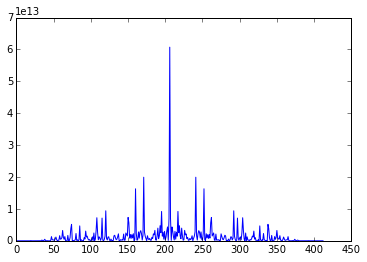

In [94]:
pylab.plot(np.correlate(yt_[0], yt_[0], 'full'))

B. Using Haar wavelets

In [101]:
def short_time_haar(x, window_len=4096, window_shift=2048):
	haar_result = []
	haar1_result = []
	for i in range(0, len(x)-window_len, window_shift):
		haar_result.append(haar(np.array(x[i:i+window_len])))
	return sp.absolute(haar_result)

In [103]:
for i in range(0,5):
		name = str(i+1)
		if i == 4:
			name = 'Rerecord'
		rate, data = sp.io.wavfile.read('./Data/tracks/' + name + '.wav')
		if len(data.shape) > 1:
			data = data[:,0]
		X = np.array(short_time_haar(data[0:10*rate]))
		Python.audio_example.plot_transform(X)
		pylab.savefig('haar_spectogram' + name + '.png')
		pylab.close()
